In [8]:
!nvidia-smi


Thu Apr 25 16:30:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
cd /content/drive/MyDrive/Brake Light Detection.v4i.yolov8

/content/drive/MyDrive/Brake Light Detection.v4i.yolov8


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=15 imgsz=800 plots=True

New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=15, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, c

In [ ]:
!ls runs/detect/train


args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1709491788.87a759a66345.2559.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2820.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2821.jpg  weights
P_curve.png					    train_batch2822.jpg
PR_curve.png					    train_batch2.jpg


In [ ]:
!cat runs/detect/train/results.csv

                  epoch,         train/box_loss,         train/cls_loss,         train/dfl_loss,   metrics/precision(B),      metrics/recall(B),       metrics/mAP50(B),    metrics/mAP50-95(B),           val/box_loss,           val/cls_loss,           val/dfl_loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                 1.5767,                 1.9909,                 1.6562,                 0.4165,                0.38298,                0.35116,                0.13715,                 2.0139,                 2.9938,                 2.3661,             0.00066312,             0.00066312,             0.00066312
                      2,                 1.5742,                 1.7236,                 1.6801,                 0.4208,                0.39072,                0.35512,                0.14026,                 2.0233,                 2.5953,                 2.3656,              0.0012771,              0.0012771,              0.

In [ ]:
!yolo task=classify mode=val model= runs/detect/train/weights/best.pt data=data.yaml

WARNING ⚠️ conflicting 'task=classify' passed with 'task=detect' model. Ignoring 'task=classify' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
100% 755k/755k [00:00<00:00, 16.6MB/s]
val: Scanning /content/drive/MyDrive/Potholes Detection.v2i.yolov8/valid/labels.cache... 259 images, 0 backgrounds, 0 corrupt: 100% 259/259 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [06:29<00:00, 22.93s/it]
                   all        259        517      0.673      0.658      0.693      0.349
Speed: 12.6ms preprocess, 1452.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/131 /content/drive/MyDrive/Potholes Detection.v2i.yolov8/test/images/img-105_jpg.rf.10ebcbcd3aaf27f8c95c7fd086117ab5.jpg: 800x800 1 Pothole - v1 raw, 996.3ms
image 2/131 /content/drive/MyDrive/Potholes Detection.v2i.yolov8/test/images/img-107_jpg.rf.bfa64358a24e26d3a76ecd54f468990f.jpg: 800x800 2 Pothole - v1 raws, 1435.8ms
image 3/131 /content/drive/MyDrive/Potholes Detection.v2i.yolov8/test/images/img-112_jpg.rf.1c0a95a14e44e7dabdd16139bcbdf5dc.jpg: 800x800 1 Pothole - v1 raw, 978.6ms
image 4/131 /content/drive/MyDrive/Potholes Detection.v2i.yolov8/test/images/img-118_jpg.rf.7b6c52fada01750dd5fb4f9798fcd773.jpg: 800x800 1 Pothole - v1 raw, 980.2ms
image 5/131 /content/drive/MyDrive/Potholes Detection.v2i.yolov8/test/images/img-129_jpg.rf.5047c6da886c1c341451a0ac1bb6f04a.jpg: 800x800 2 Pothole - v1 raws, 971.6ms


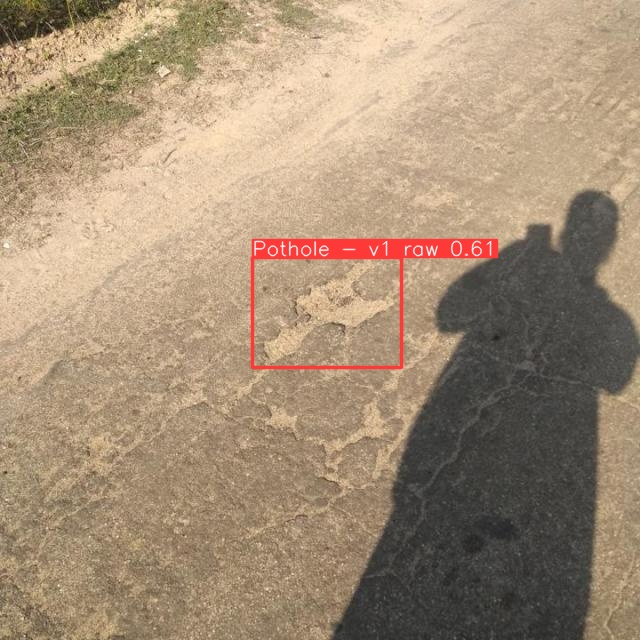

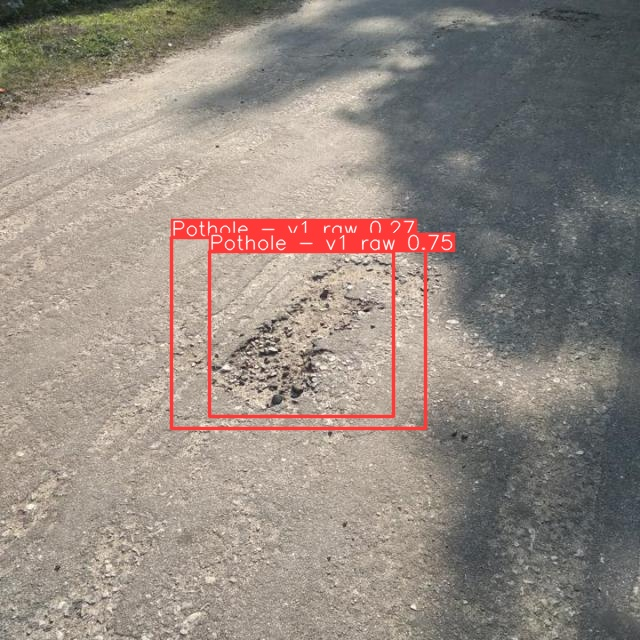

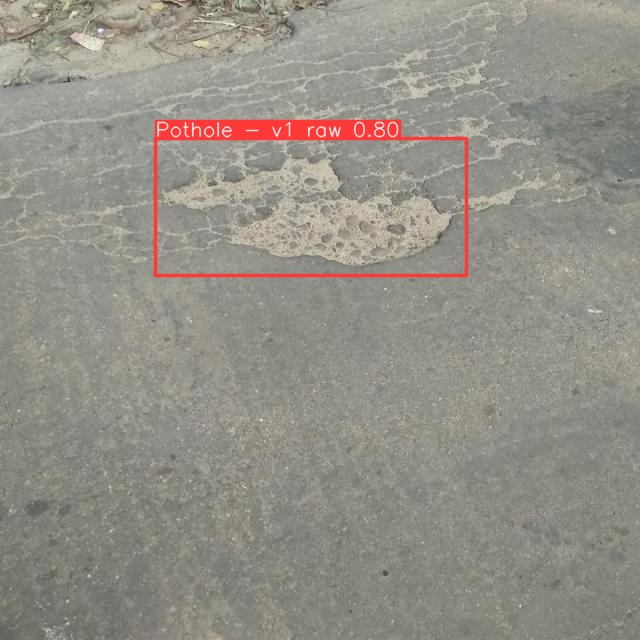

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source='https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Pothole_in_Villeray%2C_Montr%C3%A9al.jpg/300px-Pothole_in_Villeray%2C_Montr%C3%A9al.jpg'

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

100% 29.2k/29.2k [00:00<00:00, 1.30MB/s]
image 1/1 /content/drive/MyDrive/Potholes Detection.v2i.yolov8/300px-Pothole_in_Villeray,_Montréal.jpg: 608x800 2 Pothole - v1 raws, 837.5ms
Speed: 19.9ms preprocess, 837.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model='runs/detect/train/weights/best.pt' conf=0.5 source='0' show=True


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 445, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 242, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 205, in predict_cli
    for _ in gen:  # running CLI inference without accumulating any outputs (do not modify)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextl